In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil
import networkx as nx

from textwrap import wrap

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
# Likert scales
frequency = [
    '1 - Very Rarely',
    '2 - Rarely',
    '3 - Occasionally',
    '4 - Frequently',
    '5 - Very Frequently'
]
collaboration = [
    '1 - Very negative collaboration',
    '2 - Negative collaboration',
    '3 - Moderate collaboration',
    '4 - Positive collaboration',
    '5 - Very positive collaboration'
]

In [5]:
columns = ['Q01[SQ001]','Q01[SQ002]','Q33[SQ1]','Q33[SQ2]','Q33[SQ3]','Q33[SQ4]','Q33[SQ5]']

In [6]:
profile = data[columns]

In [7]:
# profile

In [8]:
# Manually check the connections, names might be not be written in the exact same way

# Show the data with:
# profile

# And then build the edges between participants accordingly
edges = [[0,2], [1,7], [2,0], [3,4], [4,3], [5,6], [6,5], [7,1]]

# Create the graph of participants
G = nx.DiGraph()
G.add_edges_from(edges)

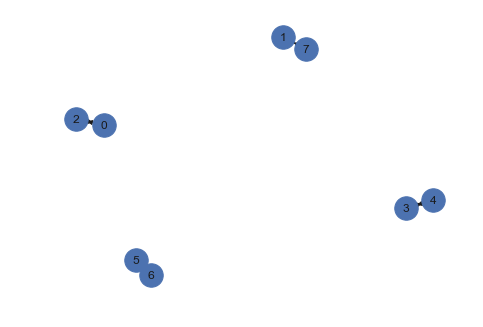

In [9]:
# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='b', node_size=550, with_labels=True)

plt.savefig("svg/Q33-38-39-42-graph.svg", bbox_inches="tight")
plt.savefig("png/Q33-38-39-42-graph.png", dpi=300, bbox_inches="tight")

In [10]:
# Get a adjancey matrix of the graph, with pandas
df = nx.to_pandas_adjacency(G, dtype=int)
df

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0


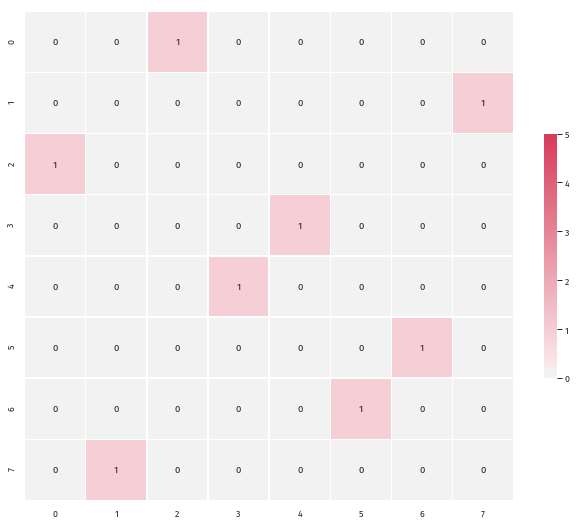

In [11]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Q34 With whom of the other participants in this research study have you already worked together in open and making initiatives?

In [12]:
data34 = data[['Q34[SQ001]','Q34[SQ002]','Q34[SQ003]','Q34[SQ004]','Q34[SQ005]']]
data34

,Q34[SQ001],Q34[SQ002],Q34[SQ003],Q34[SQ004],Q34[SQ005]
0,No,NaN,NaN,NaN,NaN
1,Yes,NaN,NaN,NaN,NaN
2,Yes,NaN,NaN,NaN,NaN
3,Yes,NaN,NaN,NaN,NaN
4,Yes,NaN,NaN,NaN,NaN
5,Uncertain,NaN,NaN,NaN,NaN
6,No,NaN,NaN,NaN,NaN
7,Yes,NaN,NaN,NaN,NaN


## Q35 How often have you interacted (worked, discussed, ...) with the other participants in the development of making and open source initiative before this research study?

In [13]:
data35 = data[['Q35[SQ001]','Q35[SQ002]','Q35[SQ003]','Q35[SQ004]','Q35[SQ005]']]
data35

,Q35[SQ001],Q35[SQ002],Q35[SQ003],Q35[SQ004],Q35[SQ005]
0,2 - Rarely,NaN,NaN,NaN,NaN
1,4 - Frequently,NaN,NaN,NaN,NaN
2,3 - Occasionally,NaN,NaN,NaN,NaN
3,4 - Frequently,NaN,NaN,NaN,NaN
4,4 - Frequently,NaN,NaN,NaN,NaN
5,2 - Rarely,NaN,NaN,NaN,NaN
6,3 - Occasionally,NaN,NaN,NaN,NaN
7,5 - Very Frequently,NaN,NaN,NaN,NaN


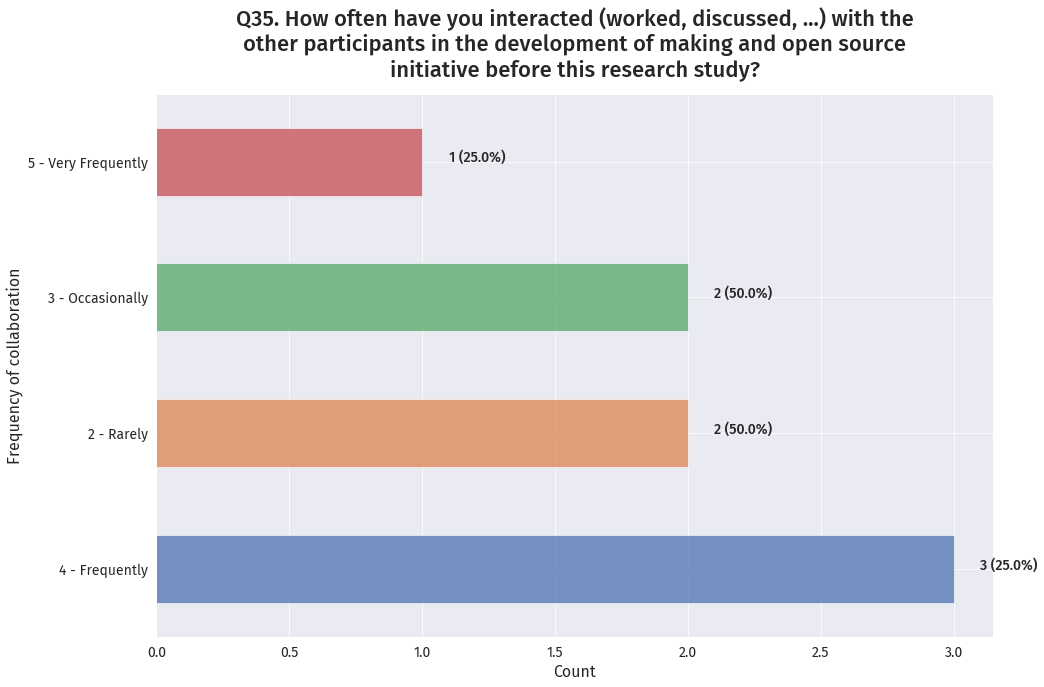

In [14]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Frequency of collaboration', fontsize=16)
title = "Q35. How often have you interacted (worked, discussed, ...) with the other participants in the development of making and open source initiative before this research study?"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
profile = data35['Q35[SQ001]'].value_counts(dropna=False)
profile_percentage = profile.value_counts(normalize=True, dropna=False) * 100
profile.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+str(profile_percentage[v])+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q35.svg", bbox_inches="tight")
plt.savefig("png/Q35.png", dpi=300, bbox_inches="tight")

In [15]:
# Cycle through the rows
for k,i in enumerate(data35.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = frequency.index(i[1][j])+1
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q35"] = weight
    
# Convert the edges to dataframe
df35 = nx.to_pandas_adjacency(G, weight="Q35", dtype=int)
df35

,0,1,2,3,4,5,6,7
0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,4
2,3,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0
4,0,0,0,4,0,0,0,0
5,0,0,0,0,0,0,2,0
6,0,0,0,0,0,3,0,0
7,0,5,0,0,0,0,0,0


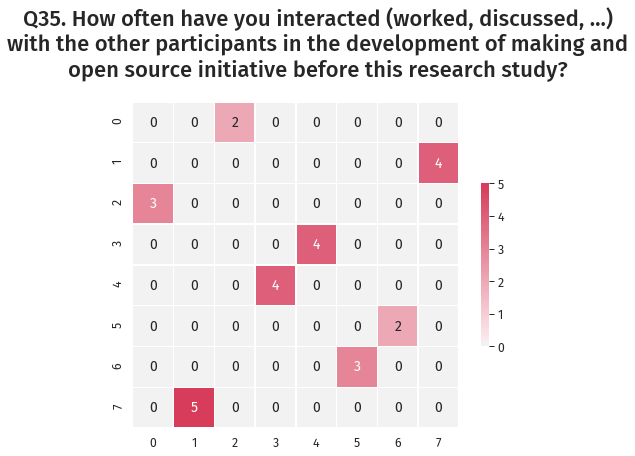

In [16]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df35, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q35. How often have you interacted (worked, discussed, ...) with the other participants in the development of making and open source initiative before this research study?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.1, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q35-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q35-matrix.png", dpi=300, bbox_inches="tight")

## Q36 How do often do you think all the participants in this research study have collaborated among them in making and open source initiative before?

In [17]:
data36 = data[['Q36[SQ001]','Q36[SQ002]','Q36[SQ003]','Q36[SQ004]','Q36[SQ005]']]
data36

,Q36[SQ001],Q36[SQ002],Q36[SQ003],Q36[SQ004],Q36[SQ005]
0,4 - Positive collaboration,NaN,NaN,NaN,NaN
1,4 - Positive collaboration,NaN,NaN,NaN,NaN
2,4 - Positive collaboration,NaN,NaN,NaN,NaN
3,4 - Positive collaboration,NaN,NaN,NaN,NaN
4,3 - Moderate collaboration,NaN,NaN,NaN,NaN
5,4 - Positive collaboration,NaN,NaN,NaN,NaN
6,5 - Very positive collaboration,NaN,NaN,NaN,NaN
7,4 - Positive collaboration,NaN,NaN,NaN,NaN


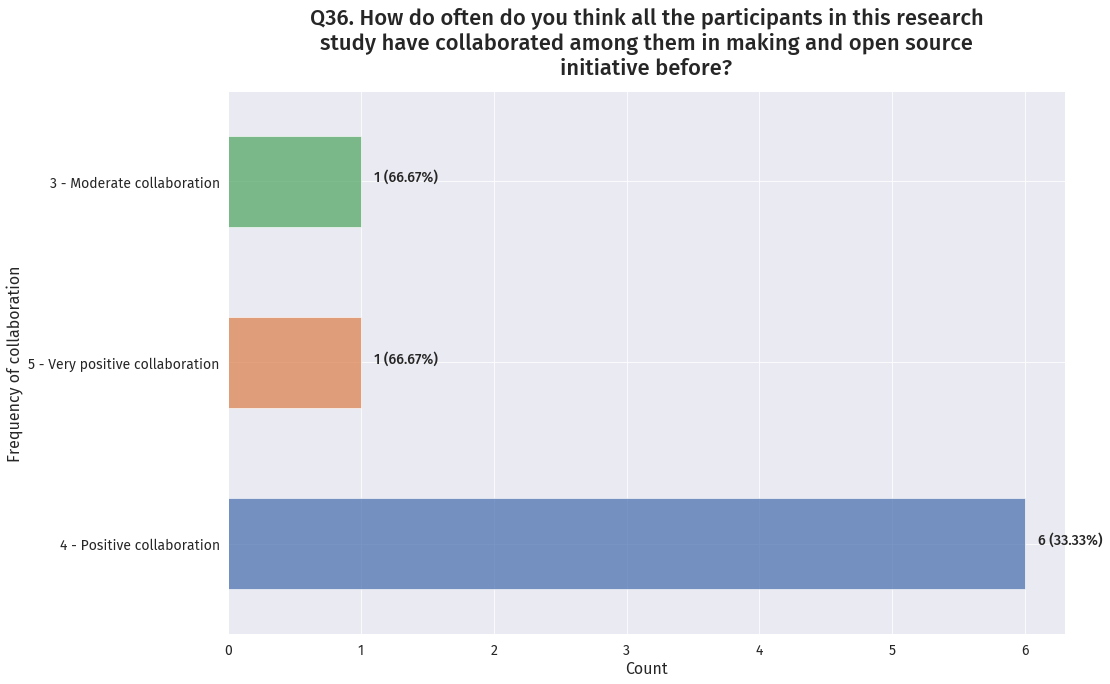

In [18]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Frequency of collaboration', fontsize=16)
title = "Q36. How do often do you think all the participants in this research study have collaborated among them in making and open source initiative before?"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
profile = data36['Q36[SQ001]'].value_counts(dropna=False)
profile_percentage = profile.value_counts(normalize=True, dropna=False) * 100
profile.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+"%.2f" % profile_percentage[v]+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q36.svg", bbox_inches="tight")
plt.savefig("png/Q36.png", dpi=300, bbox_inches="tight")

In [19]:
# Cycle through the rows
for k,i in enumerate(data36.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = collaboration.index(i[1][j])+1
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q36"] = weight
    
# Convert the edges to dataframe
df36 = nx.to_pandas_adjacency(G, weight="Q36", dtype=int)
df36

,0,1,2,3,4,5,6,7
0,0,0,4,0,0,0,0,0
1,0,0,0,0,0,0,0,4
2,4,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0
4,0,0,0,3,0,0,0,0
5,0,0,0,0,0,0,4,0
6,0,0,0,0,0,5,0,0
7,0,4,0,0,0,0,0,0


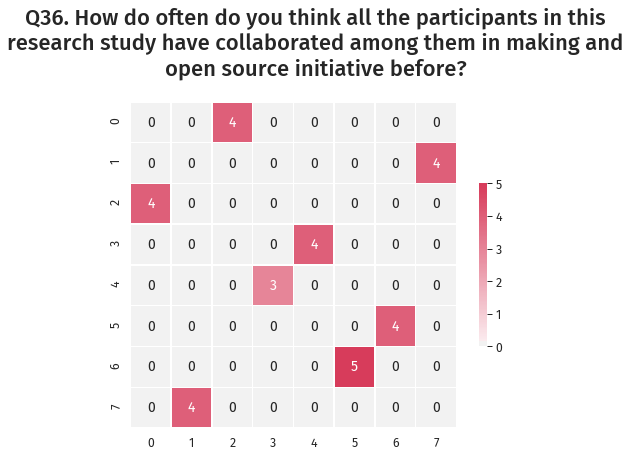

In [20]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df36, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q36. How do often do you think all the participants in this research study have collaborated among them in making and open source initiative before?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.1, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q36-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q36-matrix.png", dpi=300, bbox_inches="tight")

## Q37 How do often do you think all the participants in this research study have collaborated among them in making and open source initiative before?

In [21]:
data37 = data[[
    'Q37[SQ001_SQ001]','Q37[SQ001_SQ002]', 'Q37[SQ001_SQ003]', 'Q37[SQ001_SQ004]', 'Q37[SQ001_SQ005]',
    'Q37[SQ002_SQ001]','Q37[SQ002_SQ002]', 'Q37[SQ002_SQ003]', 'Q37[SQ002_SQ004]', 'Q37[SQ002_SQ005]',
    'Q37[SQ003_SQ001]','Q37[SQ003_SQ002]', 'Q37[SQ003_SQ003]', 'Q37[SQ003_SQ004]', 'Q37[SQ003_SQ005]',
    'Q37[SQ004_SQ001]','Q37[SQ004_SQ002]', 'Q37[SQ004_SQ003]', 'Q37[SQ004_SQ004]', 'Q37[SQ004_SQ005]',
    'Q37[SQ005_SQ001]','Q37[SQ005_SQ002]', 'Q37[SQ005_SQ003]', 'Q37[SQ005_SQ004]', 'Q37[SQ005_SQ005]',
]]
data37

,Q37[SQ001_SQ001],Q37[SQ001_SQ002],Q37[SQ001_SQ003],Q37[SQ001_SQ004],Q37[SQ001_SQ005],Q37[SQ002_SQ001],Q37[SQ002_SQ002],Q37[SQ002_SQ003],Q37[SQ002_SQ004],Q37[SQ002_SQ005],Q37[SQ003_SQ001],Q37[SQ003_SQ002],Q37[SQ003_SQ003],Q37[SQ003_SQ004],Q37[SQ003_SQ005],Q37[SQ004_SQ001],Q37[SQ004_SQ002],Q37[SQ004_SQ003],Q37[SQ004_SQ004],Q37[SQ004_SQ005],Q37[SQ005_SQ001],Q37[SQ005_SQ002],Q37[SQ005_SQ003],Q37[SQ005_SQ004],Q37[SQ005_SQ005]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Cycle through the rows
for k,i in enumerate(data37.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = i[1][j]
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q37"] = weight
    
# Convert the edges to dataframe
df37 = nx.to_pandas_adjacency(G, weight="Q37", dtype=int)
df37

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,3,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,3,0
6,0,0,0,0,0,5,0,0
7,0,4,0,0,0,0,0,0


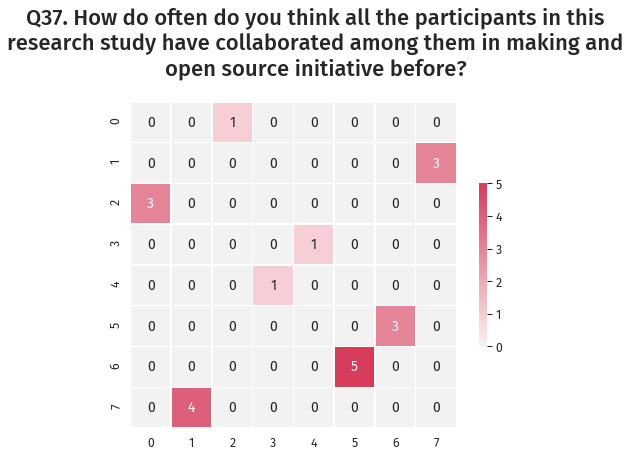

In [23]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df37, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q37. How do often do you think all the participants in this research study have collaborated among them in making and open source initiative before?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.1, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q37-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q37-matrix.png", dpi=300, bbox_inches="tight")

## Q38 How positive or negative do you think the collaborations among all the participants have been in the development of making and open source initiatives before this research study?

In [24]:
data38= data[[
    'Q38[SQ001_SQ001]','Q38[SQ001_SQ002]', 'Q38[SQ001_SQ003]', 'Q38[SQ001_SQ004]', 'Q38[SQ001_SQ005]',
    'Q38[SQ002_SQ001]','Q38[SQ002_SQ002]', 'Q38[SQ002_SQ003]', 'Q38[SQ002_SQ004]', 'Q38[SQ002_SQ005]',
    'Q38[SQ003_SQ001]','Q38[SQ003_SQ002]', 'Q38[SQ003_SQ003]', 'Q38[SQ003_SQ004]', 'Q38[SQ003_SQ005]',
    'Q38[SQ004_SQ001]','Q38[SQ004_SQ002]', 'Q38[SQ004_SQ003]', 'Q38[SQ004_SQ004]', 'Q38[SQ004_SQ005]',
    'Q38[SQ005_SQ001]','Q38[SQ005_SQ002]', 'Q38[SQ005_SQ003]', 'Q38[SQ005_SQ004]', 'Q38[SQ005_SQ005]',
]]
data38

,Q38[SQ001_SQ001],Q38[SQ001_SQ002],Q38[SQ001_SQ003],Q38[SQ001_SQ004],Q38[SQ001_SQ005],Q38[SQ002_SQ001],Q38[SQ002_SQ002],Q38[SQ002_SQ003],Q38[SQ002_SQ004],Q38[SQ002_SQ005],Q38[SQ003_SQ001],Q38[SQ003_SQ002],Q38[SQ003_SQ003],Q38[SQ003_SQ004],Q38[SQ003_SQ005],Q38[SQ004_SQ001],Q38[SQ004_SQ002],Q38[SQ004_SQ003],Q38[SQ004_SQ004],Q38[SQ004_SQ005],Q38[SQ005_SQ001],Q38[SQ005_SQ002],Q38[SQ005_SQ003],Q38[SQ005_SQ004],Q38[SQ005_SQ005]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Cycle through the rows
for k,i in enumerate(data38.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = i[1][j]
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q38"] = weight
    
# Convert the edges to dataframe
df38 = nx.to_pandas_adjacency(G, weight="Q38", dtype=int)
df38

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,3,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,5,0
6,0,0,0,0,0,5,0,0
7,0,4,0,0,0,0,0,0


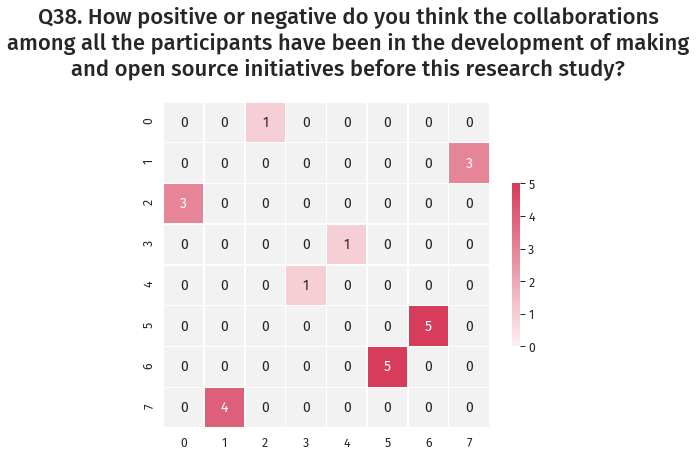

In [26]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df38, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q38. How positive or negative do you think the collaborations among all the participants have been in the development of making and open source initiatives before this research study?"
f.suptitle("\n".join(wrap(title, 65)), fontsize=22, y=1.1, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q38-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q38-matrix.png", dpi=300, bbox_inches="tight")

## Q39 How often have you interacted with the other participants during this research study?

In [27]:
data39 = data[['Q39[SQ001]','Q39[SQ002]','Q39[SQ003]','Q39[SQ004]','Q39[SQ005]']]
data39

,Q39[SQ001],Q39[SQ002],Q39[SQ003],Q39[SQ004],Q39[SQ005]
0,3 - Occasionally,NaN,NaN,NaN,NaN
1,3 - Occasionally,NaN,NaN,NaN,NaN
2,4 - Frequently,NaN,NaN,NaN,NaN
3,4 - Frequently,NaN,NaN,NaN,NaN
4,5 - Very Frequently,NaN,NaN,NaN,NaN
5,2 - Rarely,NaN,NaN,NaN,NaN
6,5 - Very Frequently,NaN,NaN,NaN,NaN
7,3 - Occasionally,NaN,NaN,NaN,NaN


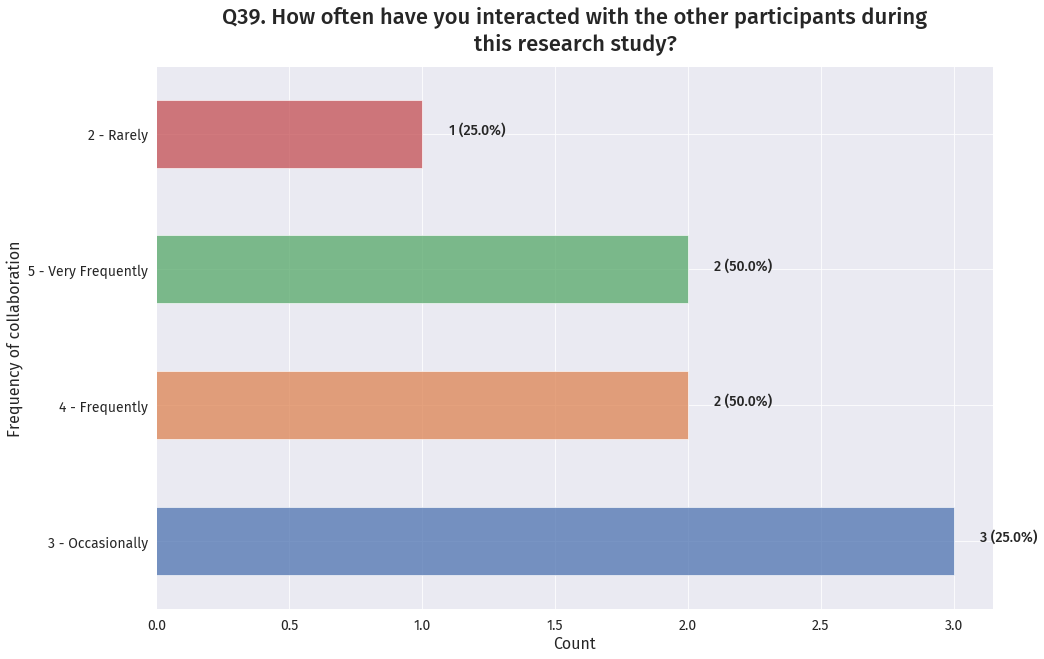

In [28]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Frequency of collaboration', fontsize=16)
title = "Q39. How often have you interacted with the other participants during this research study?"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
profile = data39['Q39[SQ001]'].value_counts(dropna=False)
profile_percentage = profile.value_counts(normalize=True, dropna=False) * 100
profile.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+str(profile_percentage[v])+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q39.svg", bbox_inches="tight")
plt.savefig("png/Q39.png", dpi=300, bbox_inches="tight")

In [29]:
# Cycle through the rows
for k,i in enumerate(data39.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = frequency.index(i[1][j])+1
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q39"] = weight
    
# Convert the edges to dataframe
df39 = nx.to_pandas_adjacency(G, weight="Q39", dtype=int)
df39

,0,1,2,3,4,5,6,7
0,0,0,3,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,4,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0
4,0,0,0,5,0,0,0,0
5,0,0,0,0,0,0,2,0
6,0,0,0,0,0,5,0,0
7,0,3,0,0,0,0,0,0


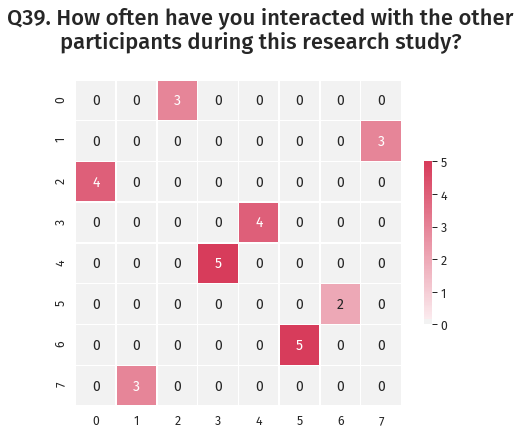

In [30]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df39, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q39. How often have you interacted with the other participants during this research study?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.05, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q39-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q39-matrix.png", dpi=300, bbox_inches="tight")

## Q40 How positive or negative have been your interactions with the other participants during the research study?

In [31]:
data40 = data[['Q40[SQ001]','Q40[SQ002]','Q40[SQ003]','Q40[SQ004]','Q40[SQ005]']]
data40

,Q40[SQ001],Q40[SQ002],Q40[SQ003],Q40[SQ004],Q40[SQ005]
0,NaN,NaN,NaN,NaN,NaN
1,3 - Moderate collaboration,NaN,NaN,NaN,NaN
2,4 - Positive collaboration,NaN,NaN,NaN,NaN
3,4 - Positive collaboration,NaN,NaN,NaN,NaN
4,4 - Positive collaboration,NaN,NaN,NaN,NaN
5,1 - Very negative collaboration,NaN,NaN,NaN,NaN
6,5 - Very positive collaboration,NaN,NaN,NaN,NaN
7,3 - Moderate collaboration,NaN,NaN,NaN,NaN


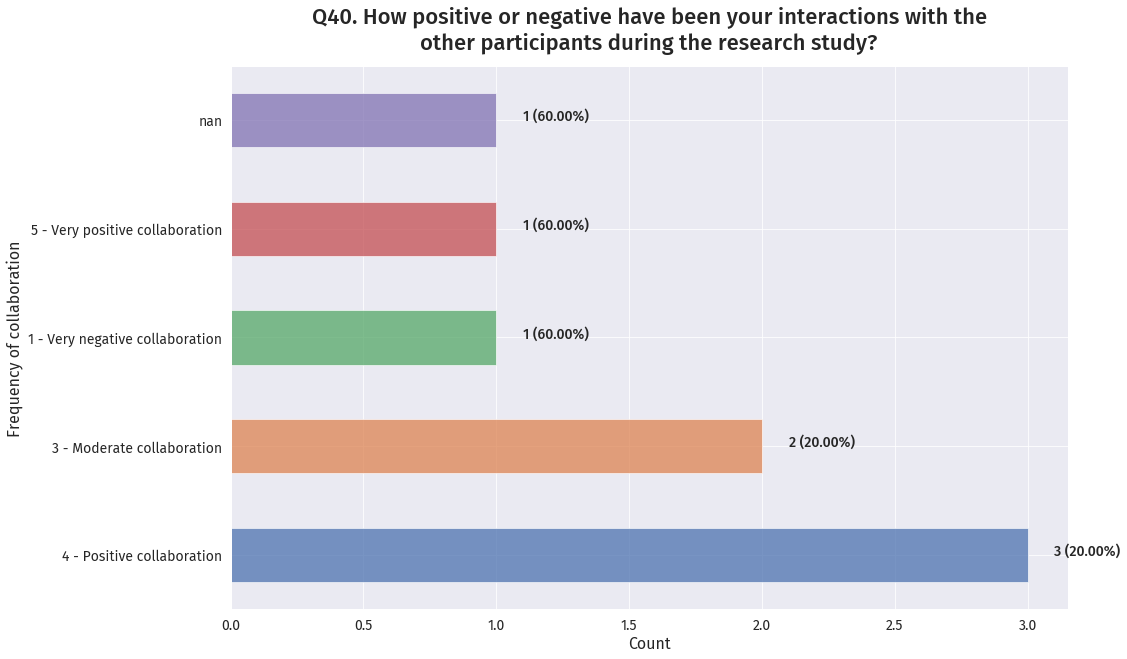

In [32]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Frequency of collaboration', fontsize=16)
title = "Q40. How positive or negative have been your interactions with the other participants during the research study?"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
profile = data40['Q40[SQ001]'].value_counts(dropna=False)
profile_percentage = profile.value_counts(normalize=True, dropna=False) * 100
profile.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+"%.2f" % profile_percentage[v]+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q40.svg", bbox_inches="tight")
plt.savefig("png/Q40.png", dpi=300, bbox_inches="tight")

In [33]:
# Cycle through the rows
for k,i in enumerate(data40.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = collaboration.index(i[1][j])+1
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q40"] = weight
    
# Convert the edges to dataframe
df40 = nx.to_pandas_adjacency(G, weight="Q40", dtype=int)
df40

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,4,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0
4,0,0,0,4,0,0,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,0,5,0,0
7,0,3,0,0,0,0,0,0


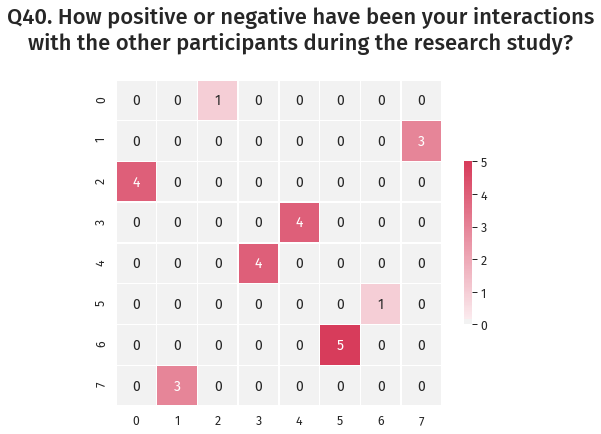

In [34]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df40, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q40. How positive or negative have been your interactions with the other participants during the research study?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.05, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q40-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q40-matrix.png", dpi=300, bbox_inches="tight")

## Q41 How do often do you think all the participants have collaborated among them during this research study?

In [35]:
data41 = data[[
    'Q41[SQ001_SQ001]','Q41[SQ001_SQ002]', 'Q41[SQ001_SQ003]', 'Q41[SQ001_SQ004]', 'Q41[SQ001_SQ005]',
    'Q41[SQ002_SQ001]','Q41[SQ002_SQ002]', 'Q41[SQ002_SQ003]', 'Q41[SQ002_SQ004]', 'Q41[SQ002_SQ005]',
    'Q41[SQ003_SQ001]','Q41[SQ003_SQ002]', 'Q41[SQ003_SQ003]', 'Q41[SQ003_SQ004]', 'Q41[SQ003_SQ005]',
    'Q41[SQ004_SQ001]','Q41[SQ004_SQ002]', 'Q41[SQ004_SQ003]', 'Q41[SQ004_SQ004]', 'Q41[SQ004_SQ005]',
    'Q41[SQ005_SQ001]','Q41[SQ005_SQ002]', 'Q41[SQ005_SQ003]', 'Q41[SQ005_SQ004]', 'Q41[SQ005_SQ005]',
]]
data41

,Q41[SQ001_SQ001],Q41[SQ001_SQ002],Q41[SQ001_SQ003],Q41[SQ001_SQ004],Q41[SQ001_SQ005],Q41[SQ002_SQ001],Q41[SQ002_SQ002],Q41[SQ002_SQ003],Q41[SQ002_SQ004],Q41[SQ002_SQ005],Q41[SQ003_SQ001],Q41[SQ003_SQ002],Q41[SQ003_SQ003],Q41[SQ003_SQ004],Q41[SQ003_SQ005],Q41[SQ004_SQ001],Q41[SQ004_SQ002],Q41[SQ004_SQ003],Q41[SQ004_SQ004],Q41[SQ004_SQ005],Q41[SQ005_SQ001],Q41[SQ005_SQ002],Q41[SQ005_SQ003],Q41[SQ005_SQ004],Q41[SQ005_SQ005]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Cycle through the rows
for k,i in enumerate(data41.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = i[1][j]
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q41"] = weight
    
# Convert the edges to dataframe
df41 = nx.to_pandas_adjacency(G, weight="Q41", dtype=int)
df41

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,4
2,3,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,0,3,0,0
7,0,2,0,0,0,0,0,0


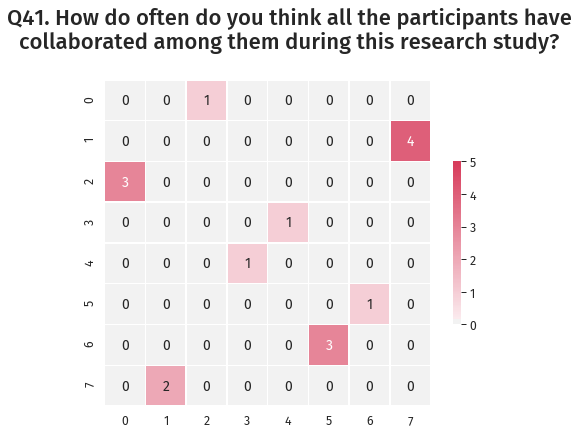

In [37]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df41, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q41. How do often do you think all the participants have collaborated among them during this research study?"
f.suptitle("\n".join(wrap(title, 60)), fontsize=22, y=1.05, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q41-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q41-matrix.png", dpi=300, bbox_inches="tight")

## Q42 How positive or negative do you think the collaborations among all the participants have been during this research study?

In [38]:
data42= data[[
    'Q42[SQ001_SQ001]','Q42[SQ001_SQ002]', 'Q42[SQ001_SQ003]', 'Q42[SQ001_SQ004]', 'Q42[SQ001_SQ005]',
    'Q42[SQ002_SQ001]','Q42[SQ002_SQ002]', 'Q42[SQ002_SQ003]', 'Q42[SQ002_SQ004]', 'Q42[SQ002_SQ005]',
    'Q42[SQ003_SQ001]','Q42[SQ003_SQ002]', 'Q42[SQ003_SQ003]', 'Q42[SQ003_SQ004]', 'Q42[SQ003_SQ005]',
    'Q42[SQ004_SQ001]','Q42[SQ004_SQ002]', 'Q42[SQ004_SQ003]', 'Q42[SQ004_SQ004]', 'Q42[SQ004_SQ005]',
    'Q42[SQ005_SQ001]','Q42[SQ005_SQ002]', 'Q42[SQ005_SQ003]', 'Q42[SQ005_SQ004]', 'Q42[SQ005_SQ005]',
]]
data42

,Q42[SQ001_SQ001],Q42[SQ001_SQ002],Q42[SQ001_SQ003],Q42[SQ001_SQ004],Q42[SQ001_SQ005],Q42[SQ002_SQ001],Q42[SQ002_SQ002],Q42[SQ002_SQ003],Q42[SQ002_SQ004],Q42[SQ002_SQ005],Q42[SQ003_SQ001],Q42[SQ003_SQ002],Q42[SQ003_SQ003],Q42[SQ003_SQ004],Q42[SQ003_SQ005],Q42[SQ004_SQ001],Q42[SQ004_SQ002],Q42[SQ004_SQ003],Q42[SQ004_SQ004],Q42[SQ004_SQ005],Q42[SQ005_SQ001],Q42[SQ005_SQ002],Q42[SQ005_SQ003],Q42[SQ005_SQ004],Q42[SQ005_SQ005]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Cycle through the rows
for k,i in enumerate(data42.iterrows()):
    # Cycle through the colums
    for j in range(len(i[1])):
        if pd.isnull(i[1][j]):
            # No edge
            pass
        else:
            # Build edge
            # Calculate the weight of the edge following the Likert scale
            weight = i[1][j]
            for e in G.edges:
                if e[0] == k:
                    G.edges[e[0],e[1]]["Q42"] = weight
    
# Convert the edges to dataframe
df42 = nx.to_pandas_adjacency(G, weight="Q42", dtype=int)
df42

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,3,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,0,3,0,0
7,0,2,0,0,0,0,0,0


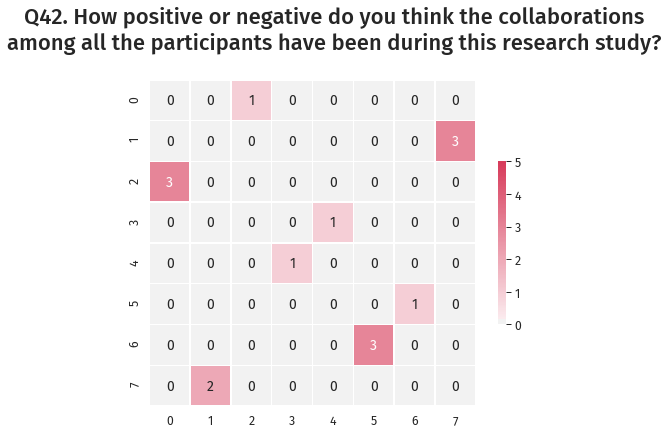

In [40]:
# Plot the adjacency matrix
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper", font_scale=1.4)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(1, 5, as_cmap=True)
sns.heatmap(df42, cmap=cmap, vmax=5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})

title = "Q42. How positive or negative do you think the collaborations among all the participants have been during this research study?"
f.suptitle("\n".join(wrap(title, 65)), fontsize=22, y=1.05, fontname='Fira Sans', fontweight="500")

plt.savefig("svg/Q42-matrix.svg", bbox_inches="tight")
plt.savefig("png/Q42-matrix.png", dpi=300, bbox_inches="tight")

In [41]:
# Save whole graph
nx.write_graphml(G, "csv/Q33-38-39-42.graphml")